### Task 1: Load the Dataset

In [19]:
import pandas as pd


# Load the dataset
file_path = "songs.csv"

# Read the CSV file
df = pd.read_csv(file_path)

print(df.head())  # Show first few rows

   Unnamed: 0                name                   artists  year  \
0           3           Mic Check  Rage Against The Machine  1999   
1           6      Born As Ghosts  Rage Against The Machine  1999   
2          12           Bombtrack  Rage Against The Machine  1992   
3          17     Know Your Enemy  Rage Against The Machine  1992   
4          20  Township Rebellion  Rage Against The Machine  1992   

                                                text  
0  Oh Wait a minute now  \nHa ha ha  \nCome on  \...  
1  The hills find peace  \nLocked armed guard pos...  
2  Ughh!  \nHey yo, it's just another bombtrack u...  
3  Huh!  \nYeah, we're comin' back then with anot...  
4  Rebel, rebel and yell  \n'Cause our people sti...  


### Task 2: Preprocessing for Sentiment Analysis

In [20]:
print(df.columns)

Index(['Unnamed: 0', 'name', 'artists', 'year', 'text'], dtype='object')


In [21]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download("stopwords")
nltk.download("wordnet")

# Rename 'text' column to 'lyrics' for consistency
df.rename(columns={"text": "lyrics"}, inplace=True)

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# Define a preprocessing function
def preprocess_text(text):
    if pd.isnull(text):  # Handle missing values
        return ""
    
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    text = re.sub(r"\d+", "", text)  # Remove numbers
    words = text.split()  # Tokenize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatization & Stopword removal
    
    return " ".join(words)  # Return cleaned text as a string

# Apply preprocessing to the lyrics column
df["processed_lyrics"] = df["lyrics"].apply(preprocess_text)

# Display the processed dataframe
from IPython.display import display
display(df[["year", "processed_lyrics"]])



[nltk_data] Downloading package stopwords to
[nltk_data]     /home/rajubuntu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/rajubuntu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,year,processed_lyrics
0,1999,oh wait minute ha ha ha come wait minute check...
1,1999,hill find peace locked armed guard post safe s...
2,1992,ughh hey yo another bombtrack ughh hey yo anot...
3,1992,huh yeah comin back another bombtrack think ya...
4,1992,rebel rebel yell cause people still dwell hell...
...,...,...
5082,1992,killing name work force burn cross work force ...
5083,1992,right light study becomes insight system disse...
5084,1992,jail cell freedom pain home hatred passed pass...
5085,1992,time bullet cold rocked ya yellow ribbon inste...


### Task 3: Sentiment Scoring

In [22]:
# Load the sentiment dictionary
dictionary_path = "dictionary.csv"
sentiment_df = pd.read_csv(dictionary_path)

# Print column names
print(sentiment_df.columns)


Index(['term', 'sentiment'], dtype='object')


In [23]:
# Rename columns to match expected names
sentiment_df.rename(columns={"term": "word", "sentiment": "score"}, inplace=True)

# Convert to dictionary format
sentiment_dict = dict(zip(sentiment_df["word"], sentiment_df["score"]))

# Function to compute sentiment score
def compute_sentiment(text):
    words = text.split()  # Tokenize words
    return sum(sentiment_dict.get(word, 0) for word in words)

# Apply sentiment scoring
df["sentiment_score"] = df["processed_lyrics"].apply(compute_sentiment)

# Display sentiment scores
from IPython.display import display
display(df[["year", "sentiment_score"]])


,year,sentiment_score
0,1999,-43
1,1999,-39
2,1992,-127
3,1992,-45
4,1992,-77
...,...,...
5082,1992,-58
5083,1992,-33
5084,1992,-37
5085,1992,-20


### Task 4: Plot Sentiment Trends Over the Years

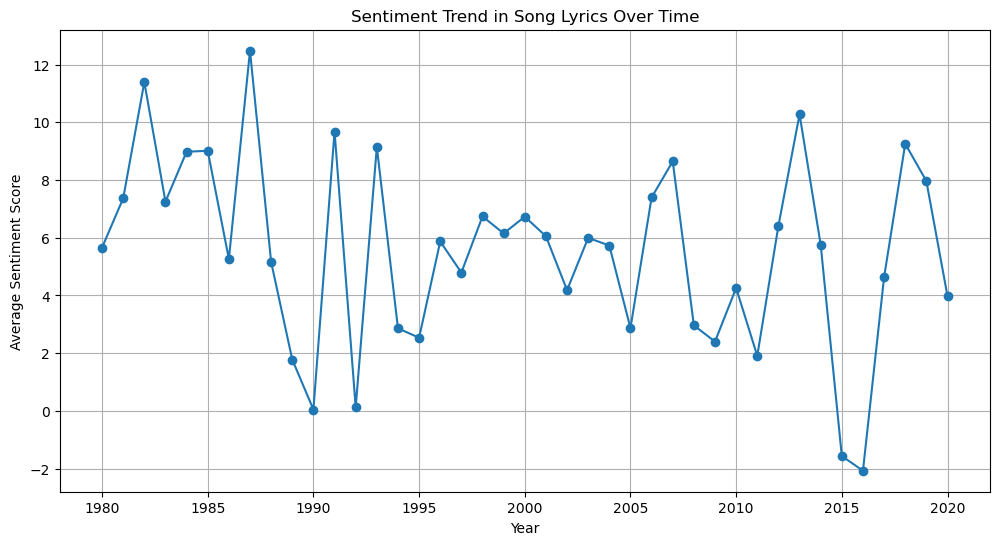

In [24]:
import matplotlib.pyplot as plt

# Group by year and calculate the average sentiment score
sentiment_trend = df.groupby("year")["sentiment_score"].mean().reset_index()

# Plot sentiment trend over the years
plt.figure(figsize=(12, 6))
plt.plot(sentiment_trend["year"], sentiment_trend["sentiment_score"], marker="o", linestyle="-")
plt.xlabel("Year")
plt.ylabel("Average Sentiment Score")
plt.title("Sentiment Trend in Song Lyrics Over Time")
plt.grid(True)
plt.show()
